****iFood CRM Data Analyst Case****

**Description**

The objective of the team is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, sixth, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled. The total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. Globally the campaign had a profit of -3.046MU. The success rate of the campaign was 15%.

The objective is of the team is to develop a model that predicts customer behavior and to apply it to the rest of the customer base. Hopefully the model will allow the company to cherry pick the customers that are most likely to purchase the offer while leaving out the non-respondents, making the next campaign highly profitable. Moreover, other than maximizing the profit of the campaign, the CMO is interested in understanding to study the characteristic features of those customers who are willing to buy the gadget.

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', None)



c:\Users\55119\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
# Importing data base
df = pd.read_csv('assets\ifood_df.csv')

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\55119\AppData\Local\Temp\ipykernel_30408\3528345521.py:2: SyntaxWarning: invalid escape sequence '\i'
  df = pd.read_csv('assets\ifood_df.csv')


In [5]:
# Viewing the dataset
display(df)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


# Processing the data

In [6]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
# Checking for the presence of null or duplicate values
values_nulls = df.isnull().sum()

print(values_nulls)

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# Analysing the dataset

In [8]:
df['Range_Age'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])

In [9]:
# Descriptive analysis
descriptive = df.describe()

display(round(descriptive),2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0
mean,51622.0,0.0,1.0,49.0,306.0,26.0,165.0,38.0,27.0,44.0,2.0,4.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,51.0,2513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,563.0,519.0,0.0
std,20713.0,1.0,1.0,29.0,337.0,40.0,218.0,55.0,41.0,52.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,576.0,554.0,1.0
min,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,24.0,2159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-283.0,0.0
25%,35196.0,0.0,0.0,24.0,24.0,2.0,16.0,3.0,1.0,9.0,1.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,43.0,2339.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,42.0,0.0
50%,51287.0,0.0,0.0,49.0,178.0,8.0,68.0,12.0,8.0,25.0,2.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,50.0,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,343.0,288.0,0.0
75%,68281.0,1.0,1.0,74.0,507.0,33.0,232.0,50.0,34.0,56.0,3.0,6.0,4.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,61.0,2688.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,964.0,884.0,0.0
max,113734.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,262.0,321.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,11.0,1.0,80.0,2858.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2491.0,2458.0,4.0


2

In [10]:
df_marketing = df

# Customer profile

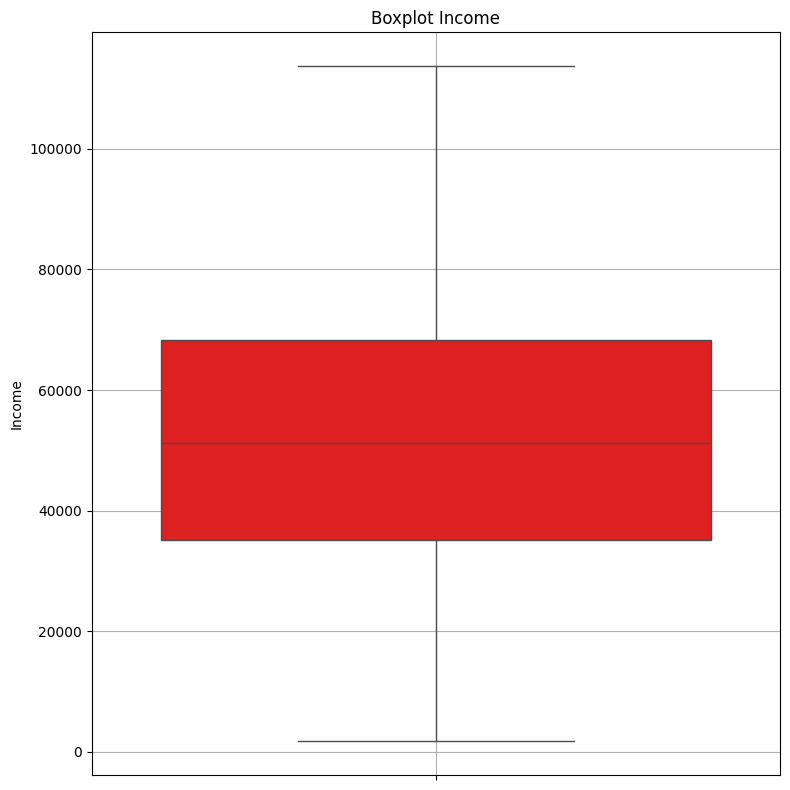

In [11]:
# The influence of income on total expenditure (MntTotal)?

plt.figure(figsize=(8,8))
sns.boxplot(data=df_marketing['Income'], color='Red')
plt.ylabel('Income')
plt.title('Boxplot Income')
plt.grid()
plt.tight_layout()
plt.show()

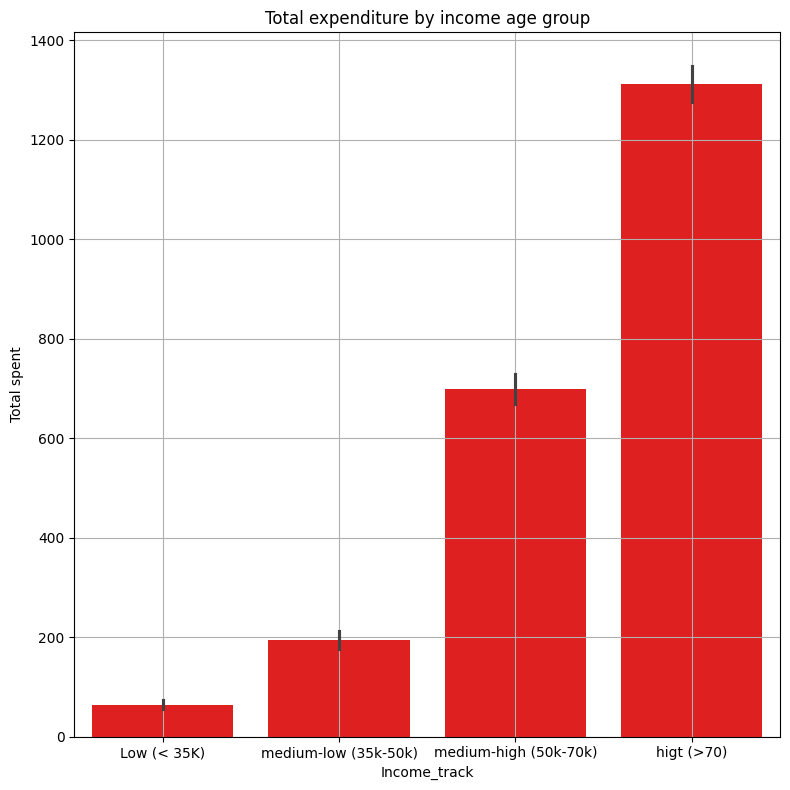

In [12]:
# creating an income age range

bins =[1730,35000,50000,70000,120000]
labels = ['Low (< 35K)','medium-low (35k-50k)','medium-high (50k-70k)', 'higt (>70)']

df_marketing['income_track'] = pd.cut(df_marketing['Income'], bins=bins, labels=labels, include_lowest=True)


plt.figure(figsize=(8,8))
sns.barplot(data=df_marketing, x=df_marketing['income_track'], y='MntTotal', color='red')
plt.ylabel('Total spent')
plt.xlabel('Income_track')
plt.title('Total expenditure by income age group')
plt.grid()
plt.tight_layout()
plt.show()

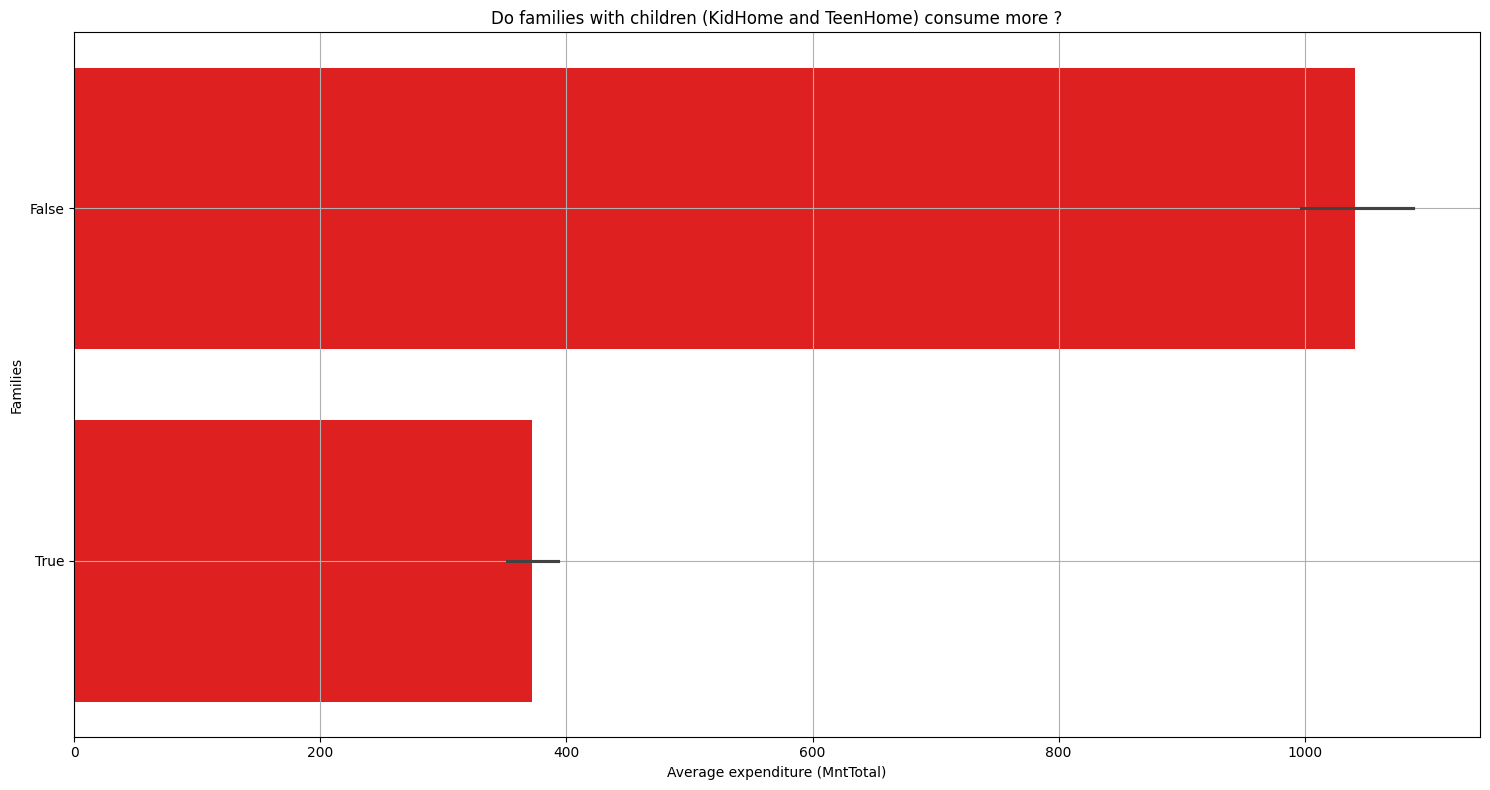

In [13]:
# Do families with children (KidHome and TeenHome) consume more (MntTotal)?

# Temporary filter for families with children

df['has_children'] = (df_marketing['Kidhome']+df_marketing['Teenhome'])>0

plt.figure(figsize=(15,8))
sns.barplot(data=df_marketing, x='MntTotal', y='has_children', color='red', orient='h')
plt.ylabel('Families')
plt.xlabel('Average expenditure (MntTotal)')
plt.title('Do families with children (KidHome and TeenHome) consume more ?')
plt.grid()
plt.tight_layout()
plt.show()

df_marketing.drop(columns='has_children', inplace=True)

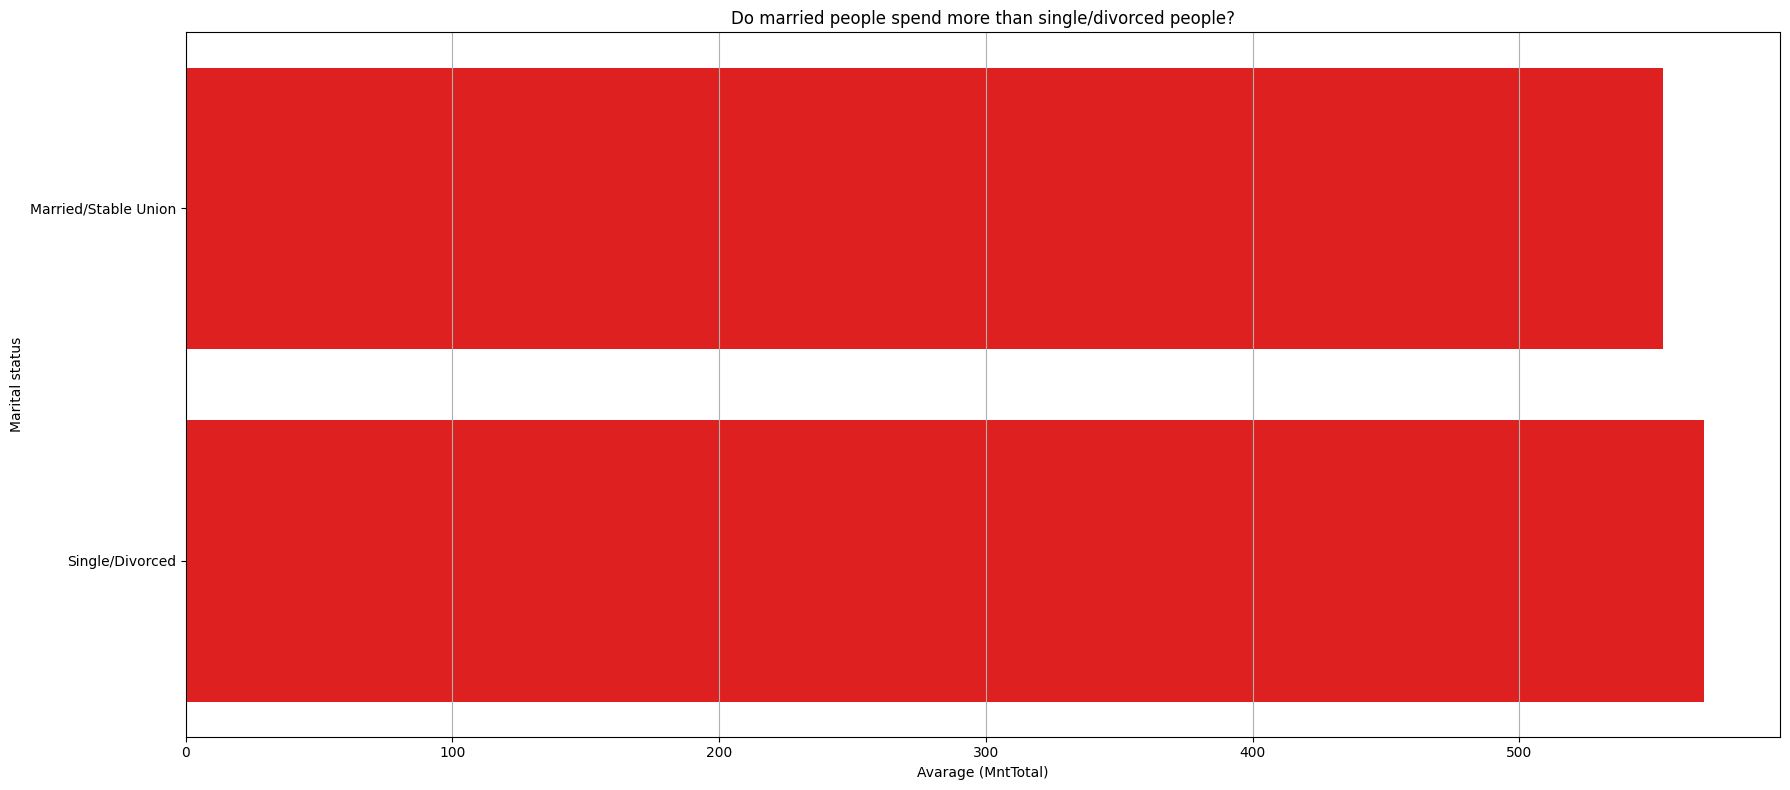

In [14]:
# Do married or unionized people (marital_Married, marital_Together) spend more (MntTotal) than single or divorced people?

# Segmenting the analysis by couples and singles in relation to the average cat
married_group = df_marketing[(df_marketing['marital_Married'] == 1) | (df_marketing['marital_Together'] == 1)]
singles_group = df_marketing[(df_marketing['marital_Divorced'] == 1) | (df_marketing['marital_Single'] == 1)]

labels = ['Married/Stable Union','Single/Divorced']
values = [
    married_group['MntTotal'].mean(),
    singles_group['MntTotal'].mean()
    ]

plt.figure(figsize=(18,8))
sns.barplot(x=values, y=labels, orient='h', color='red')
plt.title('Do married people spend more than single/divorced people?')
plt.xlabel('Avarage (MntTotal)')
plt.ylabel('Marital status')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

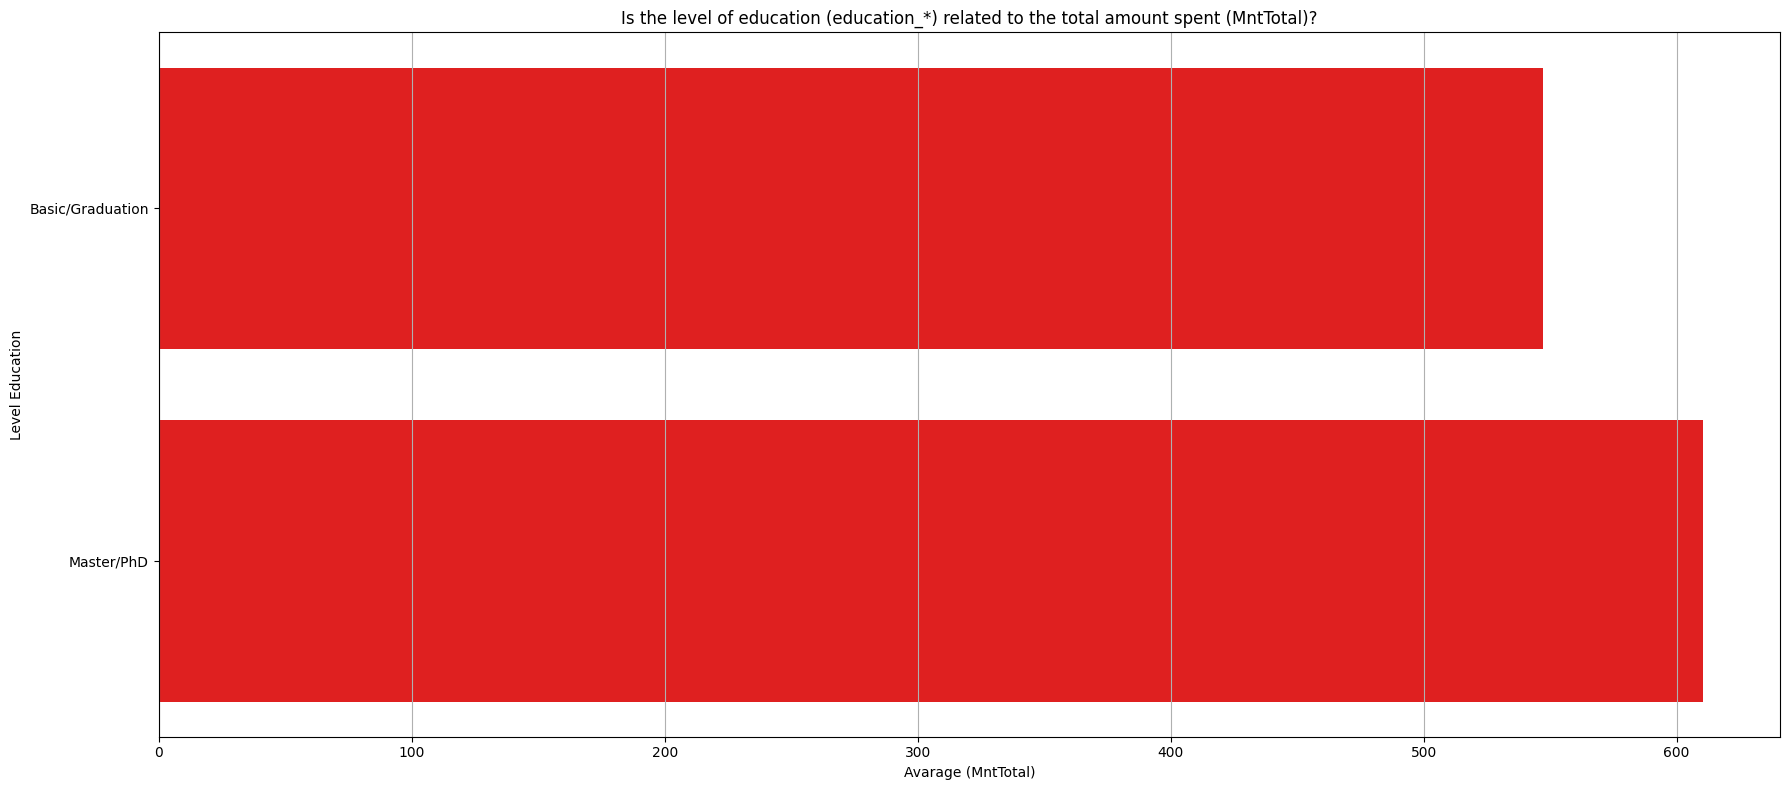

In [15]:
# Is the level of education (education_*) related to the total amount spent (MntTotal)?

education_basic = df_marketing[(df_marketing['education_Basic'] == 1) | (df_marketing['education_Graduation'] == 1)]         
education_Graduation = df_marketing[(df_marketing['education_Master'] == 1) | (df_marketing['education_PhD'] == 1)]		

labels = [
    'Basic/Graduation', 'Master/PhD'
    ]

values = [
    education_basic['MntTotal'].mean(),
    education_Graduation['MntTotal'].mean()
]

plt.figure(figsize=(18,8))
sns.barplot(x=values, y=labels, orient='h', color='red')
plt.title('Is the level of education (education_*) related to the total amount spent (MntTotal)?')
plt.xlabel('Avarage (MntTotal)')
plt.ylabel('Level Education')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

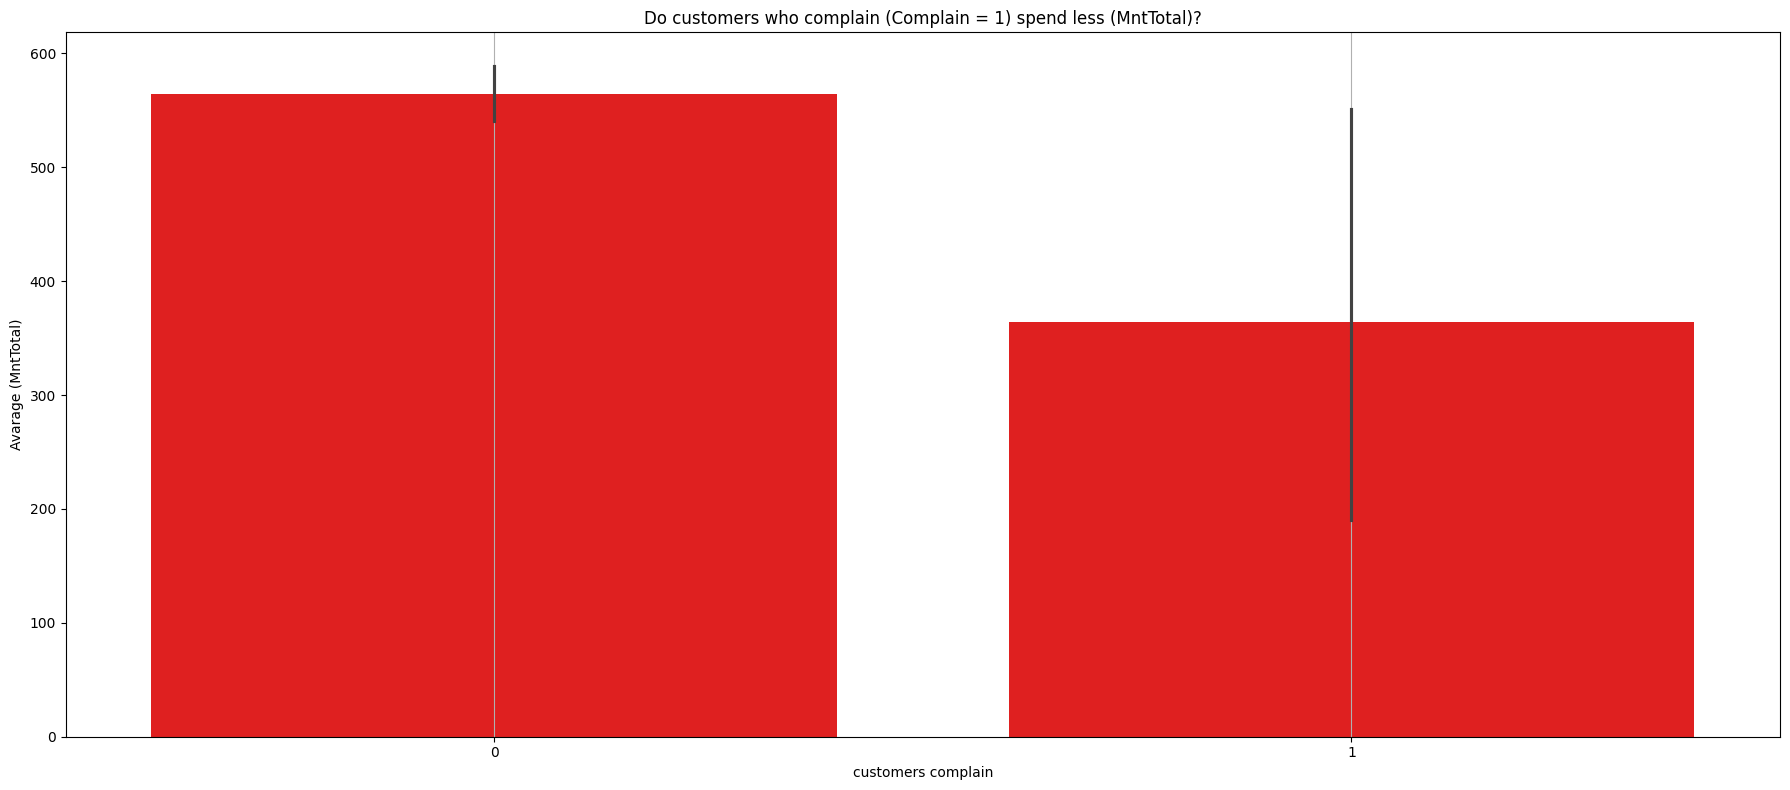

In [16]:
# Do customers who complain (Complain = 1) spend less (MntTotal)?

plt.figure(figsize=(18,8))
sns.barplot(data=df_marketing, x='Complain', y='MntTotal', color='red')
plt.title('Do customers who complain (Complain = 1) spend less (MntTotal)?')
plt.xlabel('customers complain')
plt.ylabel('Avarage (MntTotal)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


On average, customers have high incomes, varying greatly between 1,730 and 120,000 with an average of 51,622.

Based on the data, customers with incomes greater than 70K tend to spend more than 1,200, followed by customers with an average-high income between 50k - 70k with spending below 800.

Customers with children (children and teenagers) spend much less than customers without dependents.

Following the analysis, it can be noted that there is no great difference between the spending of single and married customers, with a small increase for singles.


The level of education does not show that customers with a higher level of education tend to spend a little more on products

In summary, the customer profile that spends the most are customers with a salary level greater than 70K and with an educational level of masters and PhD, single and without children.


# Products

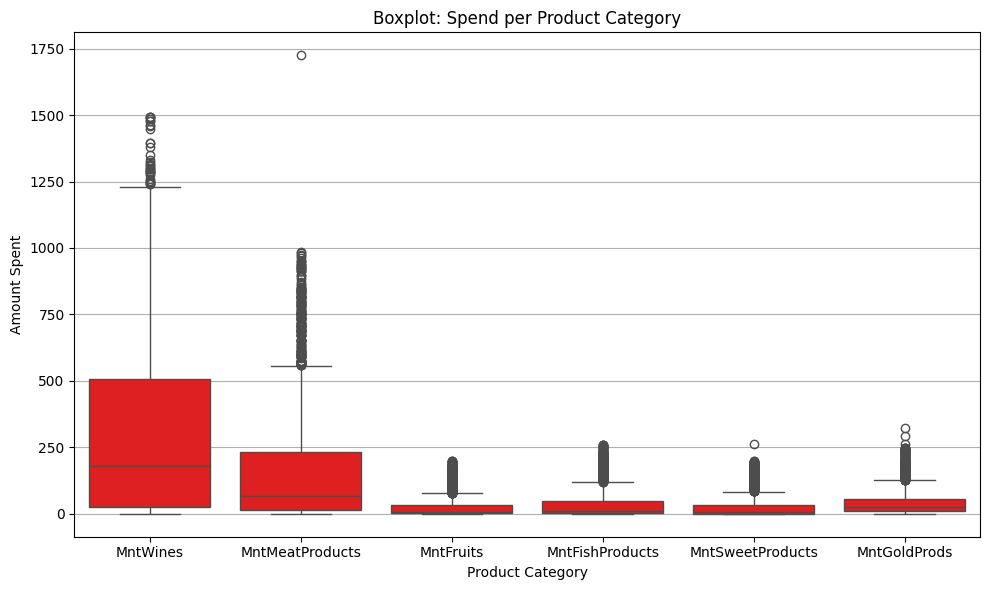

In [17]:
# Which product categories (MntWines, MntMeatProducts, etc.) are most prominent in relation to total spend (MntTotal)?

# Selecting spending data by category
products = df_marketing[['MntWines','MntMeatProducts','MntFruits','MntFishProducts','MntSweetProducts','MntGoldProds']]

# Transforming DataFrame to long format
products_melted = products.melt(var_name='Category', value_name='Amount')

# Ploting the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=products_melted, x='Category', y='Amount', color='red')
plt.title('Boxplot: Spend per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount Spent')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



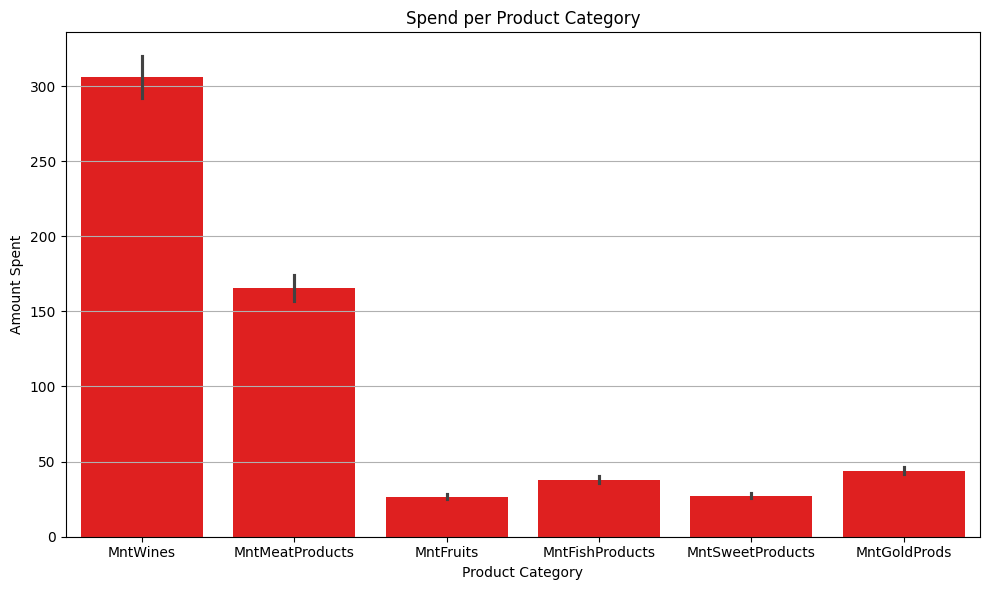

In [18]:
# Ploting the barplot
plt.figure(figsize=(10,6))
sns.barplot(data=products_melted, x='Category', y='Amount', color='red')
plt.title('Spend per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Amount Spent')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

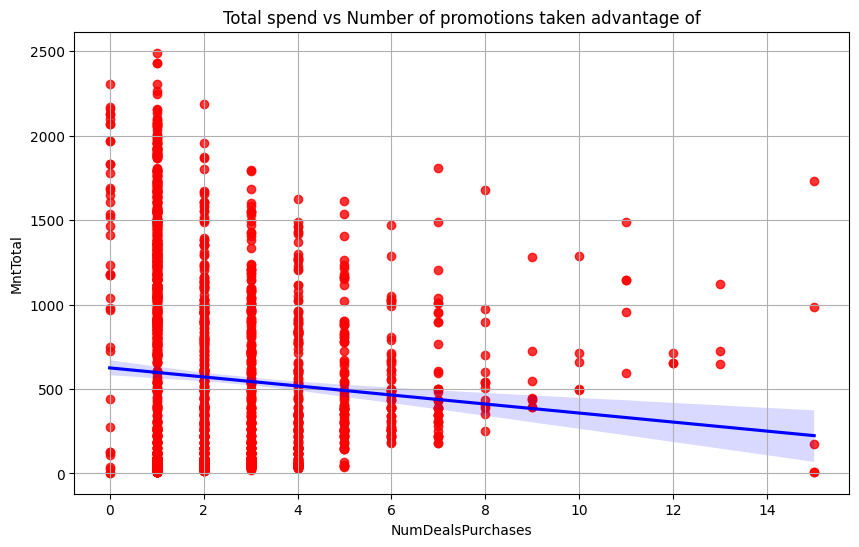

In [19]:
# Do customers who take advantage of more promotions (NumDealsPurchases) spend more (MntTotal)?

# plotting the Scatter Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='NumDealsPurchases', y='MntTotal', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Total spend vs Number of promotions taken advantage of')
plt.xlabel('NumDealsPurchases')
plt.ylabel('MntTotal')
plt.grid(True)
plt.show()


The category with the highest spending by customers is wine, with spending over 300.00.

There is no clear correlation between the product categories and discounts applied.
Based on the graphs, the greater the discount, the less customers spend.

# Shopping

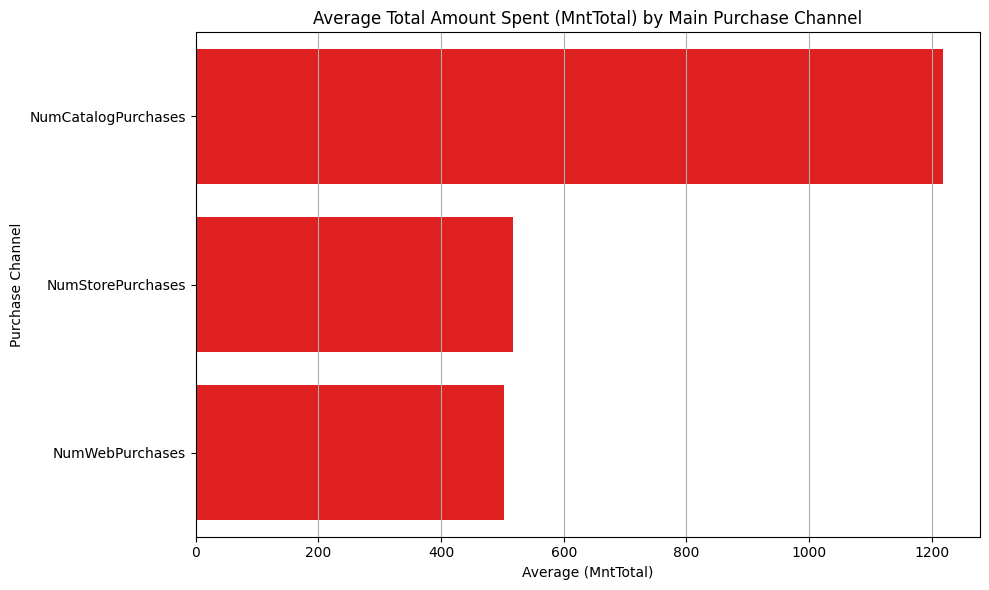

In [20]:
# Which purchase channel (Web, Catalog, Store) is most related to a higher total amount spent (MntTotal)?

df_marketing['Main_Channel'] = df_marketing[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)

channel_means = df_marketing.groupby('Main_Channel')['MntTotal'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=channel_means.values, y=channel_means.index, orient='h', color='red')
plt.title('Average Total Amount Spent (MntTotal) by Main Purchase Channel')
plt.xlabel('Average (MntTotal)')
plt.ylabel('Purchase Channel')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

df_marketing.drop(columns='Main_Channel', inplace=True)


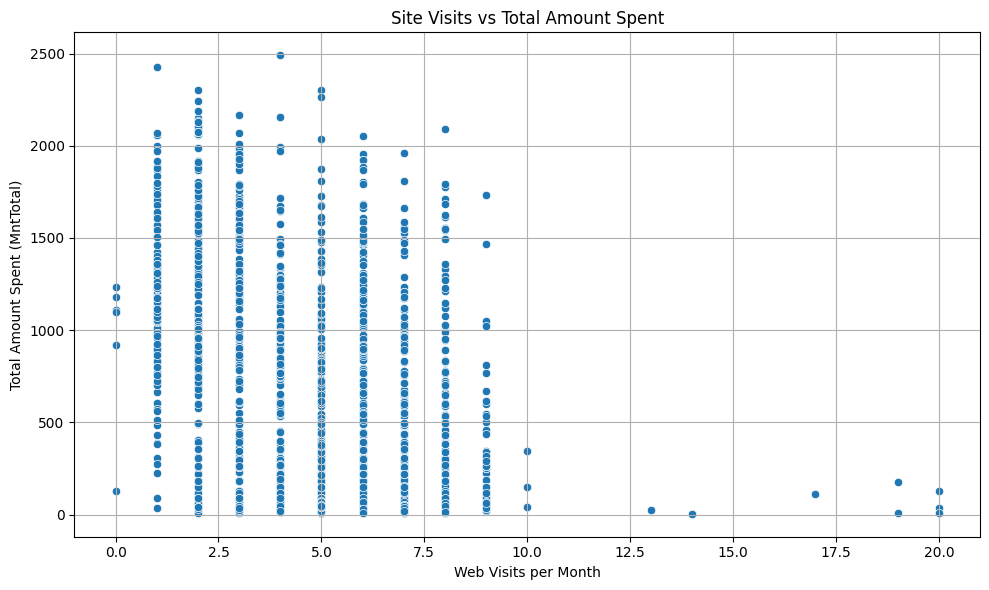

In [21]:
# Do customers who visit the site more frequently (NumWebVisitsMonth) buy more (MntTotal)?

plt.figure(figsize=(10,6))
sns.scatterplot(x='NumWebVisitsMonth', y='MntTotal', data=df_marketing)
plt.title('Site Visits vs Total Amount Spent')
plt.xlabel('Web Visits per Month')
plt.ylabel('Total Amount Spent (MntTotal)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
corr = df_marketing[['NumWebVisitsMonth','MntTotal']].corr(method='pearson')

print("\nMatriz de correlação (Pearson):")
print(corr)


Matriz de correlação (Pearson):
                   NumWebVisitsMonth  MntTotal
NumWebVisitsMonth           1.000000 -0.501639
MntTotal                   -0.501639  1.000000


The preferred purchasing channel for customers is through catalogs.

The more visits to the site, the lower the purchase rate, with no strong correlation between visits and spending.

# Marketing campaigns


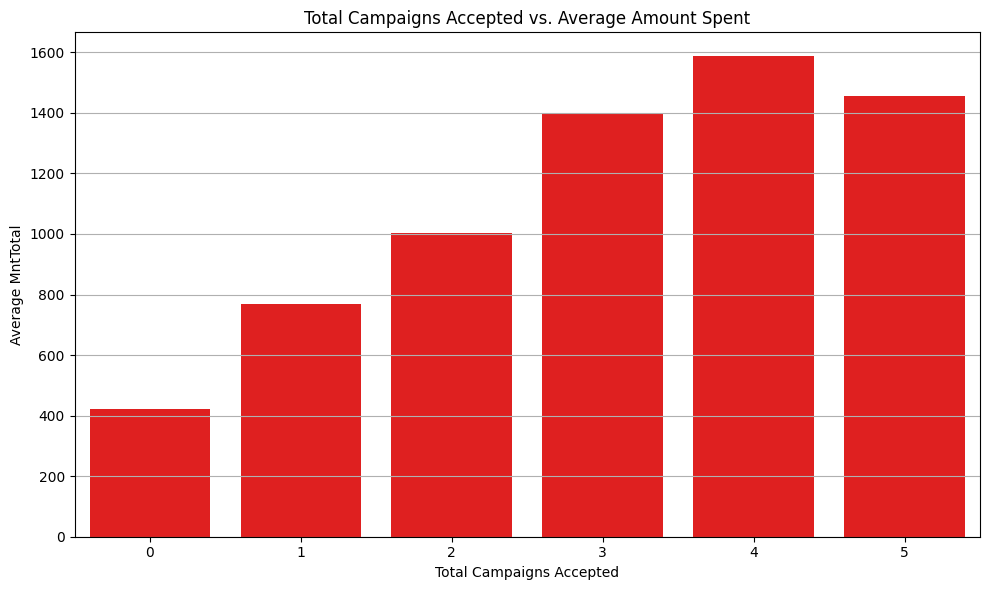

In [23]:
# Did customers who accepted previous campaigns (AcceptedCmp ) spend more (MntTotal)? 

df_marketing['TotalAcceptedCmp'] = (
    df_marketing['AcceptedCmp1'] +
    df_marketing['AcceptedCmp2'] +
    df_marketing['AcceptedCmp3'] +
    df_marketing['AcceptedCmp4'] +
    df_marketing['AcceptedCmp5'] +
    df_marketing['Response']
)

grouped = df_marketing.groupby('TotalAcceptedCmp')['MntTotal'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='TotalAcceptedCmp', y='MntTotal', data=grouped, color='red')
plt.title('Total Campaigns Accepted vs. Average Amount Spent')
plt.xlabel('Total Campaigns Accepted')
plt.ylabel('Average MntTotal')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


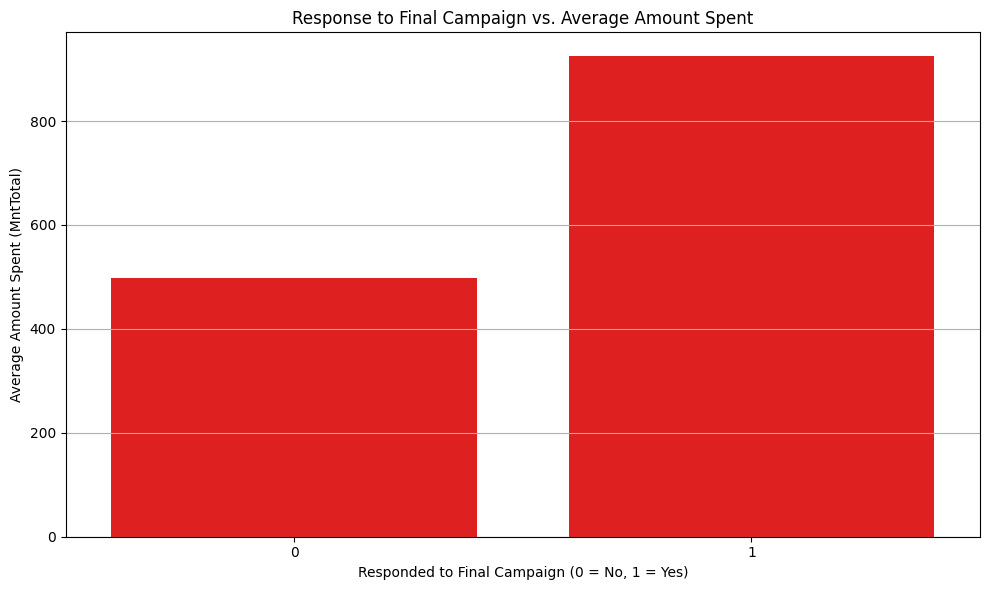

In [24]:
# Do customers who responded to the final campaign (Response = 1) have a higher total spend (MntTotal)?

last_campaign = df_marketing.groupby('Response', as_index=False)['MntTotal'].mean()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Response', y='MntTotal', data=last_campaign, color='red')
plt.title('Response to Final Campaign vs. Average Amount Spent')
plt.xlabel('Responded to Final Campaign (0 = No, 1 = Yes)')
plt.ylabel('Average Amount Spent (MntTotal)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Based on visual analysis, the campaign with the highest level of acceptance (amount spent per campaign) was campaign 4 with an average total spend of 1,600, the last campaign launched comes close with a total spend of over 1,400 in the last 2 years.

# Hypothesis test

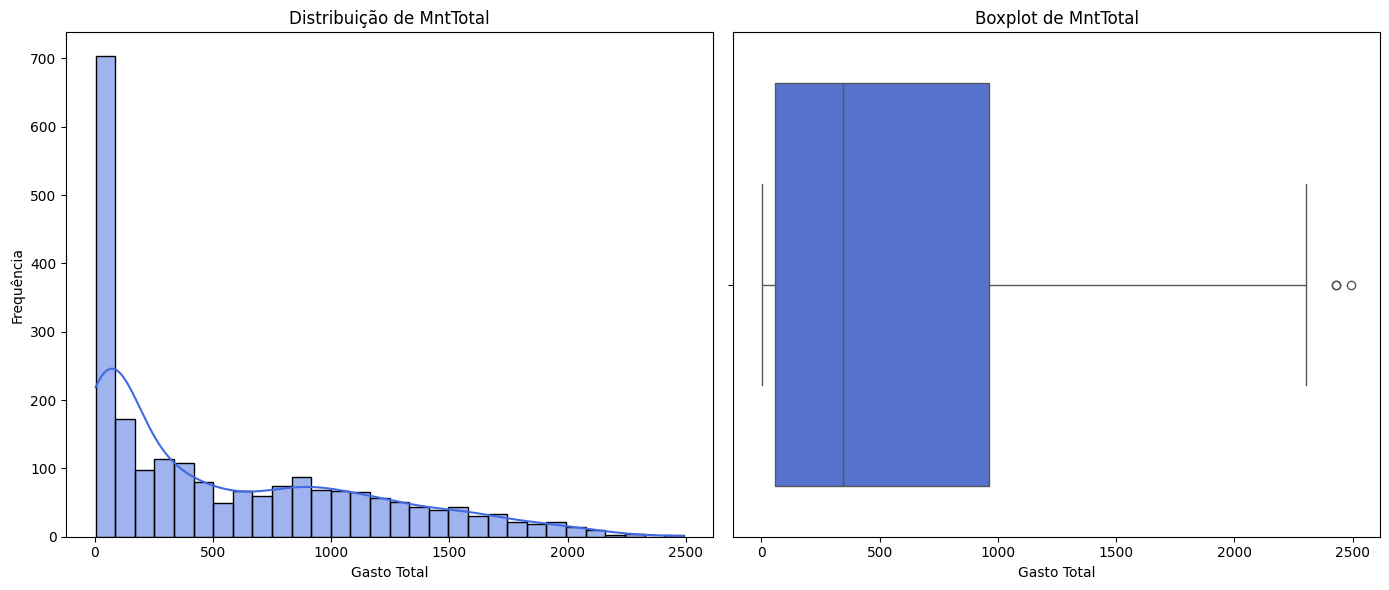

In [25]:
# Definindo o tamanho das figuras
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MntTotal', bins=30, kde=True, color='royalblue')
plt.title('Distribuição de MntTotal')
plt.xlabel('Gasto Total')
plt.ylabel('Frequência')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='MntTotal', color='royalblue')
plt.title('Boxplot de MntTotal')
plt.xlabel('Gasto Total')

plt.tight_layout()
plt.show()

***1️⃣ Hypothesis 1: Customers with income > 70K tend to spend more than 1,200***
***-Student's t-test (one-tailed)***

In [26]:
# Filtering customers with income > 70K
high_income_clients = df_marketing[df_marketing['Income']> 70000]['MntTotal']


# Hypothesis Testing
f_stat, p_value = stats.ttest_1samp(high_income_clients,1200, alternative='greater')


# Results
print("\nHypothesis Test for Singles vs Marrieds")
print(f"Test Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
 print("➡️ We reject H0: Customers with income > 70K really tend to spend more than 1,200.")
else:
 print("➡️ We do not reject H0: There is not enough evidence to state that they spend more than 1,200.")


Hypothesis Test for Singles vs Marrieds
Test Statistic: 5.83
P-Value: 0.0000
➡️ We reject H0: Customers with income > 70K really tend to spend more than 1,200.


***2️⃣ Hypothesis 2: Customers with income between 50K and 70K tend to spend less than 800*** -***-Student's t-test (one-tailed)*** 

In [27]:
# Filtering customers with income between 50K and 70K
clients_income_media = df_marketing[(df_marketing['Income'] >= 50000) & (df_marketing['Income'] <= 70000)]['MntTotal']

# Hypothesis Testing
t_stat, p_value = stats.ttest_1samp(clients_income_media, 800, alternative='less')

# Results
print("\nHypothesis Test for Customers with Income Between 50K and 70K")
print(f"Test Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
 print("➡️ We reject H0: Customers with income between 50K and 70K actually spend less than 800.")
else:
 print("➡️ We fail to reject H0: There is insufficient evidence to state that they spend less than 800.")




Hypothesis Test for Customers with Income Between 50K and 70K
Test Statistic: -6.26
P-Value: 0.0000
➡️ We reject H0: Customers with income between 50K and 70K actually spend less than 800.


***3️⃣ Hypothesis 3: Customers with children spend less than customers without children -***
***Student's t-test (independent samples)***

In [28]:
# Filtering the groups
clients_with_children = df_marketing[(df_marketing['Kidhome'] > 0) | (df_marketing['Teenhome'] > 0)]['MntTotal']
clients_without_children = df_marketing[(df_marketing['Kidhome'] == 0) & (df_marketing['Teenhome'] == 0)]['MntTotal']

# Hypothesis Testing
t_stat, p_value = stats.ttest_ind(clients_with_children, clients_without_children, alternative='less')

# Results
print("\nHypothesis Test for Clients with and without Children")
print(f"Test Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
 print("➡️ We reject H0: Clients with children really spend less than those without children.")
else:
 print("➡️ We do not reject H0: There is not enough evidence to state that they spend less.")


Hypothesis Test for Clients with and without Children
Test Statistic: -28.90
P-Value: 0.0000
➡️ We reject H0: Clients with children really spend less than those without children.


***4️⃣ Hypothesis 4: Single people preferentially spend more than married people -***
***ANOVA test to compare multiple marital statuses***

In [29]:
singles = df_marketing[df_marketing['marital_Single'] == 1]['MntTotal']
married = df_marketing[df_marketing['marital_Married'] == 1]['MntTotal']

# Hypothesis Testing
f_stat, p_value = stats.f_oneway(singles, married)

# Results
print("\nHypothesis Test for Singles vs Marrieds")
print(f"Test Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
 print("➡️ We reject H0: There is a significant difference between singles and marrieds.")
else:
 print("➡️ We fail to reject H0: There is insufficient evidence for a significant difference.")



Hypothesis Test for Singles vs Marrieds
Test Statistic: 0.47
P-Value: 0.4950
➡️ We fail to reject H0: There is insufficient evidence for a significant difference.


***5️⃣ Hypothesis 5: Customers with higher education levels (Masters and Doctorate) tend to spend more***

In [30]:
# # Filtering groups by education level
graduacao = df[df['education_Graduation'] == 1]['MntTotal']
master = df[df['education_Master'] == 1]['MntTotal']
phd = df[df['education_PhD'] == 1]['MntTotal']
basic = df[df['education_Basic'] == 1]['MntTotal']
cycle = df[df['education_2n Cycle'] == 1]['MntTotal']

# Hypothesis Testing for Multiple Groups ANOVA
f_stat, p_value = stats.f_oneway(graduacao, master, phd, basic, cycle)

# Results
print("\nHypothesis Testing for Education Levels Education")
print(f"Test Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
 print("➡️ We reject H0: There is a significant difference between education levels.")
else:
 print("➡️ We fail to reject H0: There is insufficient evidence for a difference in spending between education levels.")


Hypothesis Testing for Education Levels Education
Test Statistic: 14.75
P-Value: 0.0000
➡️ We reject H0: There is a significant difference between education levels.


***6️⃣ Hypothesis 6: Customers who accepted previous campaigns tend to spend more***

In [31]:
accepted_campaign = df_marketing[df_marketing['AcceptedCmpOverall'] > 0]['MntTotal']
did_not_accept_campaign = df_marketing[df_marketing['AcceptedCmpOverall'] == 0]['MntTotal']

# Hypothesis Test (Mann-Whitney U Test, since the groups are independent and the variable is continuous)
u_stat, p_value = stats.mannwhitneyu(accepted_campaign, did_not_accept_campaign, alternative='greater')

# Results
print("\nHypothesis Test for Campaign Acceptance")
print(f"Test Statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
 print("➡️ We reject H0: Customers who accepted campaigns actually tend to spend more.")
else:
 print("➡️ We do not reject H0: There is not enough evidence to state that accepting campaigns increases spending.")



Hypothesis Test for Campaign Acceptance
Test Statistic: 604193.00
P-value: 0.0000
➡️ We reject H0: Customers who accepted campaigns actually tend to spend more.


***7️⃣ Hypothesis 7 (Extra): Single people without children spend more than married people with children.***

In [32]:
# Filtering the groups
singles_without_children = df_marketing[(df_marketing['marital_Single'] == 1) & (df['Kidhome'] == 0) & (df['Teenhome'] == 0)]['MntTotal']
married_with_children = df[(df['marital_Married'] == 1) & ((df['Kidhome'] > 0) | (df['Teenhome'] > 0))]['MntTotal']

# Hypothesis Testing
t_stat, p_value = stats.ttest_ind(singles_without_children, married_with_children, alternative='greater')

# Results
print("\nHypothesis Test for Singles Without Children vs Marrieds With Children")
print(f"Test Statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
 print("➡️ We reject H0: Singles without children really spend more than married people with children.")
else:
 print("➡️ We fail to reject H0: There is not enough evidence to state that singles without children spend more.")



Hypothesis Test for Singles Without Children vs Marrieds With Children
Test Statistic: 16.33
P-value: 0.0000
➡️ We reject H0: Singles without children really spend more than married people with children.


🔎 Comparative Summary: Insights vs Hypothesis Testing

1️⃣ Customers with incomes above 70K tend to spend more than 1,200:
The hypothesis test confirmed this insight, showing a significant difference in spending for this income range. This audience really tends to spend more than 1,200.

2️⃣ Customers with incomes between 50K and 70K tend to spend less than 800:
The statistical test validated this assumption, indicating that customers in this income range spend less than 800, as expected.

3️⃣ Customers with children spend less than those without children:
The test results showed that this difference is real and significant, confirming the behavior identified in the initial analysis.

4️⃣ There is no big difference between the spending of singles and married people:
This insight was refuted by the hypothesis tests. There was no statistical evidence to support a significant difference in spending between singles and married people.

5️⃣ Customers with a higher level of education (Master's and PhD) tend to spend more:
The tests confirmed that there is, in fact, a difference in spending in relation to the level of education, validating the initial insight.

6️⃣ Customers who accepted previous campaigns tend to spend more:
The statistical analysis proved that those who accepted previous campaigns actually spend more, suggesting a profile more prone to consumption.

7️⃣ Singles without children spend more than married people with children:
This insight was also validated by the tests, showing a significant difference in spending between these two profiles.

# Clustering Model

c:\Users\55119\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\55119\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\55119\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\55119\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

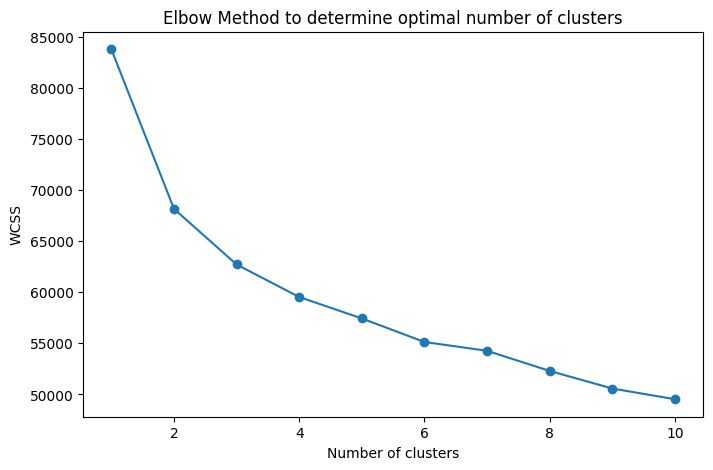

Cluster
1    1030
3     563
0     453
2     159
Name: count, dtype: int64


c:\Users\55119\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
df = df_marketing.copy()  # Use a copy to avoid modifying original df directly

# Select only numerical columns for clustering
X = df.select_dtypes(include=['int64', 'float64'])

# Scale the features for better clustering performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to determine optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters based on elbow plot
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Show cluster counts
print(df['Cluster'].value_counts())

# Now, to prepare data for a predictive model, select numeric features excluding 'Cluster' column
features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Cluster' in features:
    features.remove('Cluster')

X_model = df[features]  # Features for model input
y_model = df['Cluster']  # Target variable is cluster label


In [34]:
# Select only numeric columns (int64 and float64) for aggregation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Group by cluster and calculate mean apenas dessas colunas
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

print(cluster_summary)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        73491.748344  0.041943  0.233996  51.174393  541.951435  72.664459   
1        34483.891262  0.788350  0.445631  49.227184   41.751456   5.212621   
2        79644.918239  0.062893  0.194969  45.477987  875.037736  49.622642   
3        57465.376554  0.238011  0.925400  47.865009  439.527531  21.390764   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             434.613687       105.461369         71.649007     77.626932   
1              23.894175         7.979612          5.310680     15.949515   
2             436.251572        73.710692         58.672956     75.836478   
3             130.831261        27.602131         22.312611     59.493783   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchas

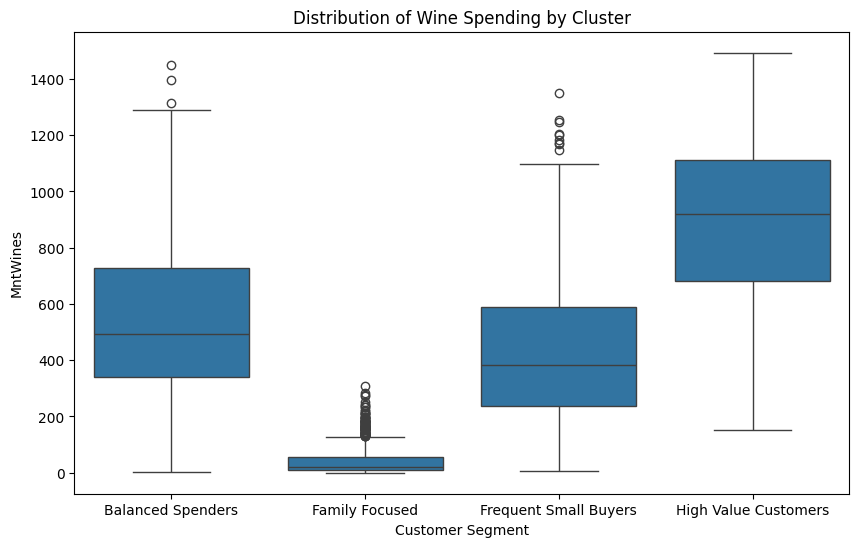

In [35]:
cluster_names = {
    0: 'Balanced Spenders',
    1: 'Family Focused',
    2: 'High Value Customers',
    3: 'Frequent Small Buyers'
}

# Create a new column with descriptive cluster names
df['Cluster_Name'] = df['Cluster'].map(cluster_names)

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster_Name', y='MntWines', data=df)
plt.title('Distribution of Wine Spending by Cluster')
plt.xlabel('Customer Segment')  # Optional: rename x-axis label for clarity
plt.show()


In [36]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42)

# Initialize and train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9501510574018127
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       138
           1       0.97      0.97      0.97       310
           2       0.93      0.95      0.94        44
           3       0.91      0.92      0.92       170

    accuracy                           0.95       662
   macro avg       0.94      0.94      0.94       662
weighted avg       0.95      0.95      0.95       662



In [37]:
import joblib

# Save the scaler and the model to disk
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

print("Scaler and KMeans model saved successfully.")

Scaler and KMeans model saved successfully.


In [38]:
def predict_cluster(new_data):
    """
    Given a new dataset (DataFrame), this function
    applies the saved scaler and KMeans model to predict clusters.
    
    Parameters:
    - new_data: pd.DataFrame with the same numeric features as the training data
    
    Returns:
    - new_data with a new column 'Cluster' containing predicted cluster labels
    """
    # Load scaler and model
    scaler = joblib.load('scaler.pkl')
    kmeans = joblib.load('kmeans_model.pkl')
    
    # Select numeric features (make sure columns match training set)
    X_new = new_data.select_dtypes(include=['int64', 'float64'])
    
    # Scale features
    X_new_scaled = scaler.transform(X_new)
    
    # Predict clusters
    new_data['Cluster'] = kmeans.predict(X_new_scaled)
    
    return new_data

# Example usage:
# new_customers = pd.read_csv('new_customers.csv')
# clustered_customers = predict_cluster(new_customers)
# print(clustered_customers.head())

In [39]:
df_marketing.to_csv('ifood.csv', index=False)